# query_strategies

In [1]:
%load_ext autoreload
%autoreload 2

import os
PROJECT_DIR = os.path.expanduser("/dados/thiagopx/deeprec-prl22")
os.chdir(PROJECT_DIR)
from notebooks.utils import show_collection, put_frame, show

In [2]:
import json
import pandas as pd

In [3]:
from notebooks.utils import replace_underscore
from notebooks.results.utils import get_dataframe, plot_1_iter, plot_by_iter

In [6]:
strategies = ["opt-l", "opt-rl", "unc-l", "unc-rl"]

## Workload experiment

* $w_{load} \in \{0.1, 0.15, 0.2, 0.25\}$
* $n_{iter} = 1$

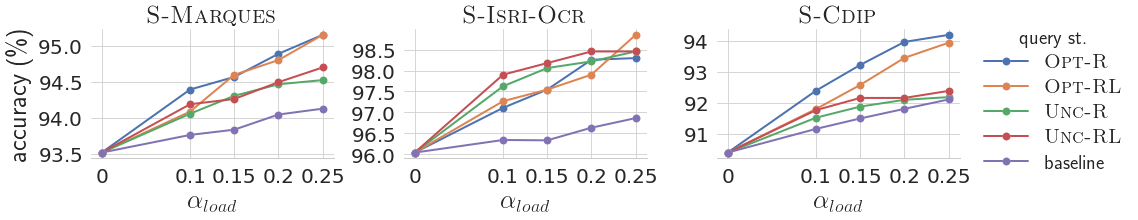

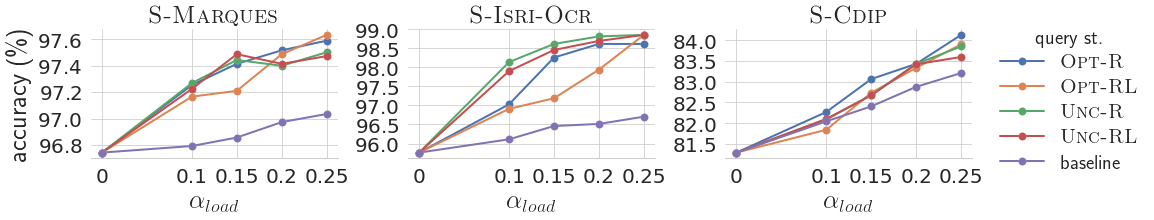

In [7]:
df = get_dataframe(".results/user_guided.json")
df = df[df["query-st"].isin(strategies)]
df_bl = get_dataframe(".results/user_guided_bl.json")
df_con = pd.concat([df, df_bl])
plot_1_iter(df_con)

### dml

In [8]:
df = get_dataframe(".results/user_guided.json")
df = df[df["query-st"].isin(strategies)]
df = df[(df["approach"] == "dml") & (df["workload"] == 0.25) & (df["num-iter"] == 1)]
df["improvement"] = df["accuracy"] - df["accuracy-original"]
df.groupby(["dataset-test", "query-st"]).agg({"improvement": ["mean", "std"]})

improvement          
                             mean       std
dataset-test query-st                      
S-CDIP       opt-l       3.797468  0.526510
             opt-rl      3.544304  0.554188
             unc-l       1.789612  0.510899
             unc-rl      1.990397  0.184156
S-ISRI-OCR   opt-l       2.257426  1.537685
             opt-rl      2.811881  1.247682
             unc-l       2.415842  0.900936
             unc-rl      2.415842  0.900936
S-MARQUES    opt-l       1.636231  0.276226
             opt-rl      1.636231  0.344944
             unc-l       1.008035  0.351836
             unc-rl      1.183346  0.215455

### max diff all cases

In [10]:
df = get_dataframe(".results/user_guided.json")
df = df[df["query-st"].isin(strategies)]
df = df[df["num-iter"] == 1]
diffs = []
for wload in [0.1, 0.15, 0.2, 0.25]:
    for approach in ["dml", "cl"]:
        df_w = df[(df["approach"] == approach) & (df["workload"] == wload)]
        acc_ul = df_w[df_w["query-st"] == "unc-l"]["accuracy"].mean()
        acc_ulr = df_w[df_w["query-st"] == "unc-rl"]["accuracy"].mean()
        diffs.append(abs(acc_ul - acc_ulr))
print(max(diffs))
        

0.21771510053693532


## Multi-iteration experiment

* $w_{load} \in \{0.1, 0.15, 0.2, 0.25\}$
* $n_{iter} \in \{1, 2, 3\}$

opt-l
opt-rl
unc-l
unc-rl


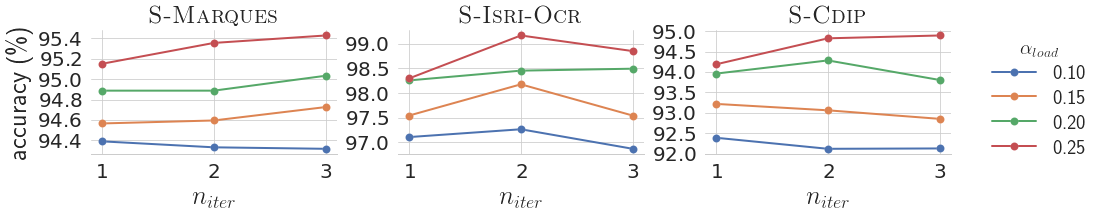

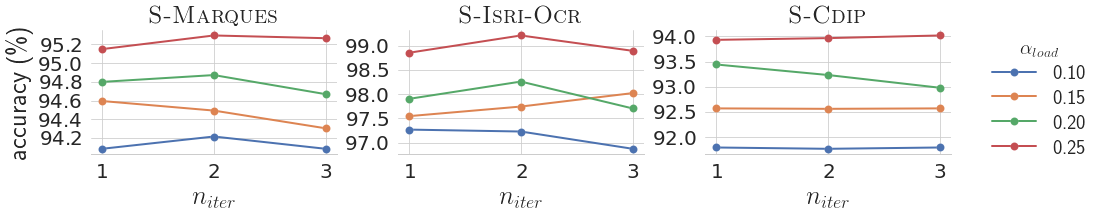

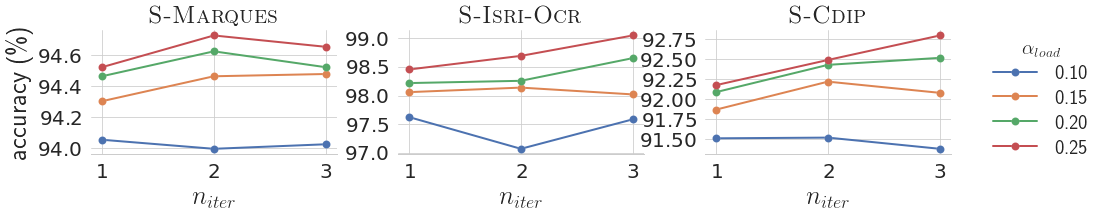

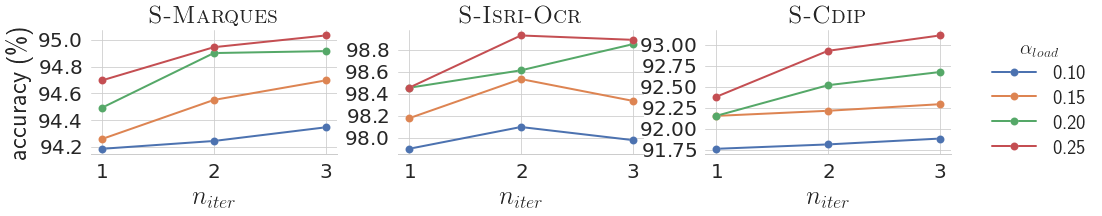

In [11]:
df = get_dataframe(".results/user_guided.json")
df = df[df["approach"] == "dml"]
plot_by_iter(df)

In [14]:
df = get_dataframe(".results/user_guided.json")
df = df[df["approach"] == "dml"]
df = df[df["curr-iter"] == df["num-iter"]]
df = df[df["num-iter"] > 0]
df = df[df["query-st"] == "opt-l"]
df = df[df["workload"] == 0.25]

df.groupby(["dataset-test", "num-iter"]).agg({"accuracy": ["mean", "std"]})

accuracy          
                            mean       std
dataset-test num-iter                     
S-CDIP       1         94.185945  0.539379
             2         94.823221  0.437145
             3         94.893060  0.300830
S-ISRI-OCR   1         98.297030  0.300312
             2         99.168317  0.472766
             3         98.851485  0.216920
S-MARQUES    1         95.149744  0.392006
             2         95.354273  0.528260
             3         95.427319  0.320904

### improvement

In [15]:
df = get_dataframe(".results/user_guided.json")
df = df[df["approach"] == "dml"]
df = df[df["curr-iter"] == df["num-iter"]]
df = df[df["num-iter"] > 0]
df = df[df["query-st"] == "opt-l"]
df = df[df["workload"] == 0.25]
df["improvement"] = df["accuracy"] - df["accuracy-original"]
df.groupby(["dataset-test", "num-iter"]).agg({"improvement": ["mean", "std"]})


improvement          
                             mean       std
dataset-test num-iter                      
S-CDIP       1           3.797468  0.526510
             2           4.434745  0.884149
             3           4.504583  0.910059
S-ISRI-OCR   1           2.257426  1.537685
             2           3.128713  1.504169
             3           2.811881  1.641296
S-MARQUES    1           1.636231  0.276226
             2           1.840760  0.427179
             3           1.913806  0.244459